In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Fitting polynomial models with linear regression. 
# Overfitting. Out-of-sample validation and degree selection

## Polinomial models with linear regression
While linear regression is intended primarily for linear models it can fit nonlinear models like $y\sim a_n x^n+a_{n-1}x^{n-1}+...+a_1 x+a_0$ as well by introducing new variables $x_1=x, x_2=x^2, x_3=x^3,..., x_n=x^n$ and performing a linear multi-variate regression of $y$ against the new set of variables $x_1,x_2,...,x_n$

### Example 1. Polynomial model

In [2]:
#generate data and put it in the dataframe
np.random.seed(2018)
x=np.arange(-10,20,0.5)
y=x**4/100+x**3/20+x**2/3+2*x+np.random.normal(loc=0,scale=3,size=60)
data1=pd.DataFrame({'x':x,'y':y}) #create a dataframe
#slice the data in three pieces (we'll talk about those later)
data1_2=data1.loc[40:49]
data1_3=data1.loc[50:59]
data1=data1.loc[0:39] 
data1.head() #for now let's stick with this first one

,x,y
0,-10.0,62.503031
1,-9.5,51.410761
2,-9.0,44.605198
3,-8.5,24.739247
4,-8.0,22.200164


In [3]:
data1.shape

(40, 2)

<AxesSubplot:xlabel='x', ylabel='y'>

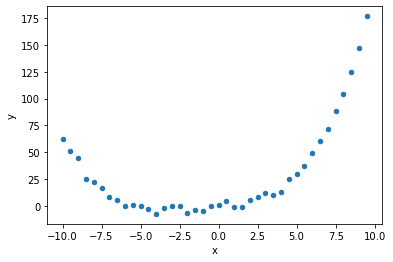

In [4]:
#visualize the observations
data1.plot(x='x',y='y',kind='scatter')

In [5]:
#does not really look linear, but lets fit a linear model first
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     16.70
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           0.000218
Time:                        08:57:36   Log-Likelihood:                -200.78
No. Observations:                  40   AIC:                             405.6
Df Residuals:                      38   BIC:                             408.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5075      5.946      5.131      0.0

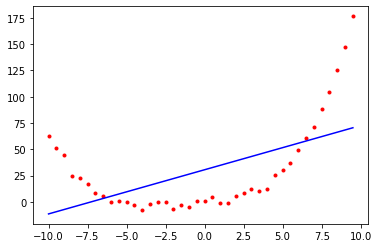

In [6]:
#visualize regression fit
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression

so despite decent R2, linear model does not really fit well. It seems a more complex dependence might be needed

Given two columns of data, $y$ and $x$, how can we fit a polynomial model $$\hat y = w_0+\sum\limits_{i=1}^M w_i\cdot x^i$$
finding coefficients $w_j$?

As you may notice the model looks almost like multi-variate regression, if one could just consider $x^i$ as distinctive regressors, rather than powers of the same regressor $x$. So why not do it that way? In the end its up to us how to use the given data, what features to consider and what model to try. It's called feature engineering.

In [7]:
#introduce another regressor being a square of x
data1['x2']=data1.x**2

In [8]:
#fit a multi-variate linear model using x and x**2 as two regressors
lm = smf.ols(formula='y~x+x2', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     316.3
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           5.41e-24
Time:                        08:57:38   Log-Likelihood:                -150.15
No. Observations:                  40   AIC:                             306.3
Df Residuals:                      37   BIC:                             311.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7347      2.546     -3.430      0.0

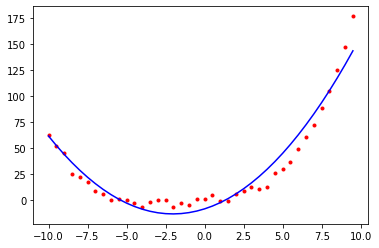

In [9]:
#visualize regression fit
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression

In [10]:
#But what if add more powers of x? Will the fit become any better?

In [11]:
M=15
for p in range(1,M+1): #add more powers of x up to 10'th
    data1['x%d'%p]=data1.x**p
data1.head()

,x,y,ypred,x2,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-10.0,62.503031,61.324344,100.00,-10.0,-1000.000,10000.0000,-100000.00000,1000000.000000,-1.000000e+07,1.000000e+08,-1.000000e+09,1.000000e+10,-1.000000e+11,1.000000e+12,-1.000000e+13,1.000000e+14,-1.000000e+15
1,-9.5,51.410761,52.215358,90.25,-9.5,-857.375,8145.0625,-77378.09375,735091.890625,-6.983373e+06,6.634204e+07,-6.302494e+08,5.987369e+09,-5.688001e+10,5.403601e+11,-5.133421e+12,4.876750e+13,-4.632912e+14
2,-9.0,44.605198,43.696480,81.00,-9.0,-729.000,6561.0000,-59049.00000,531441.000000,-4.782969e+06,4.304672e+07,-3.874205e+08,3.486784e+09,-3.138106e+10,2.824295e+11,-2.541866e+12,2.287679e+13,-2.058911e+14
3,-8.5,24.739247,35.767711,72.25,-8.5,-614.125,5220.0625,-44370.53125,377149.515625,-3.205771e+06,2.724905e+07,-2.316169e+08,1.968744e+09,-1.673432e+10,1.422418e+11,-1.209055e+12,1.027697e+13,-8.735422e+13
4,-8.0,22.200164,28.429050,64.00,-8.0,-512.000,4096.0000,-32768.00000,262144.000000,-2.097152e+06,1.677722e+07,-1.342177e+08,1.073742e+09,-8.589935e+09,6.871948e+10,-5.497558e+11,4.398047e+12,-3.518437e+13


In [12]:
#create a formulae for multi-variate regression using list comprehension
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15'

No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     700.6
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.23e-29
Time:                        08:57:39   Log-Likelihood:                -90.834
No. Observations:                  40   AIC:                             209.7
Df Residuals:                      26   BIC:                             233.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5438      1.472     -0.369      0.7

Text(0, 0.5, 'y')

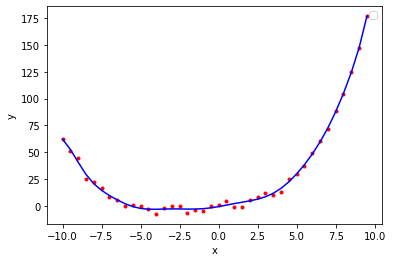

In [13]:
lm15 = smf.ols(formula=formula, data = data1).fit()
print(lm15.summary())
data1['ypred']=lm15.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Are we happy with the model?

# Example 2. Polynomial regression and illustration of overfitting 

In [18]:
#load some toy data which can help us try the polynomial regression and see overfitting in a more tangible manner
data2 = pd.read_csv('Data/Poly_example.csv')
data2

,y,x
0,-8.256892,-2.000000
1,4.732777,-1.333333
2,3.997084,-0.666667
3,-3.518884,0.000000
4,-4.661727,0.666667
5,-1.897542,1.333333
6,-16.280038,2.000000
7,-8.879330,2.666667
8,2.945957,3.333333
9,10.399779,4.000000


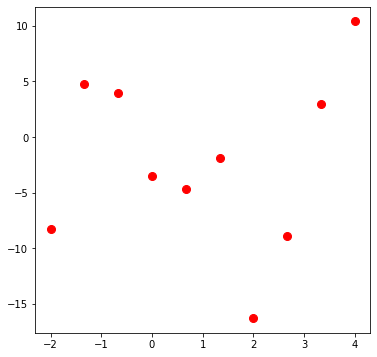

In [19]:
#plot the data - does not look like a linear trend
plt.figure(figsize = (6,6))
plt.plot(data2.x, data2.y, 'ro', markersize = 8)

In [20]:
#generate regressors as powers of x
for p in range(1,10): #add more powers of x up to 9'th
    data2['x%d'%p]=data2.x**p

In [21]:
R2 = []; Params = []
for M in range(1,10):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula, data = data2).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

In [22]:
R2

[0.016695221729687515,
 0.20770639221492693,
 0.7559287901766716,
 0.78753924885767,
 0.7875394437138781,
 0.8886700019662257,
 0.902462979728798,
 0.9638425246082077,
 1.0]

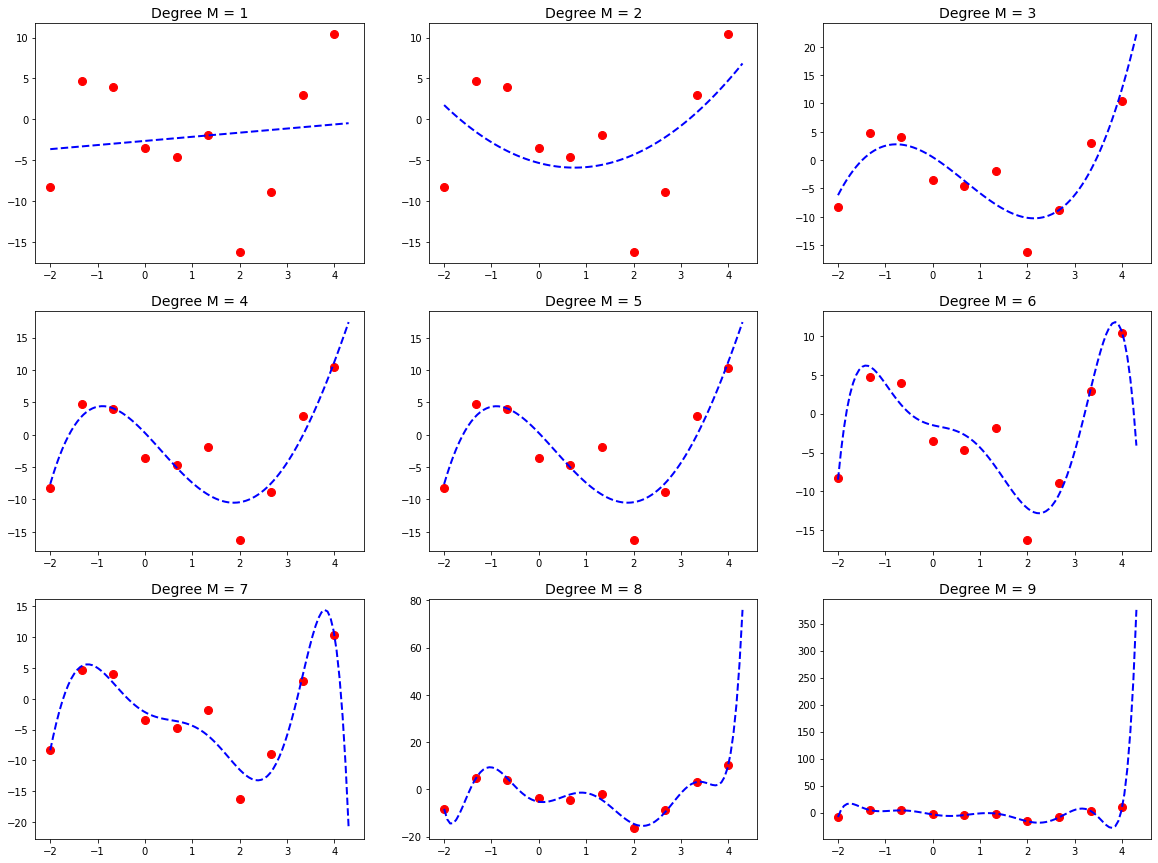

In [23]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,10):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-2,4.3,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(data2.x1, data2.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

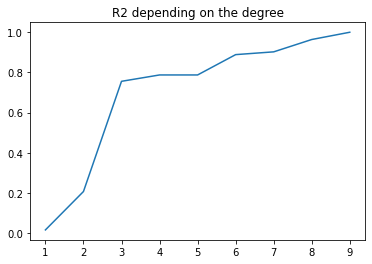

In [24]:
#also based on R2 it seems like the more regressors we add the better we do
plt.title('R2 depending on the degree')
plt.plot(range(1,10),R2)

But there is smth tricky with the shape of the curve...

In [25]:
#now if we know that the data was generated using the underlying law y=f(x)+e below with some perturbations e.
f = lambda x: x**3 - 2*x**2 - 5*x + 1
x_test=4.3; y_test=f(4.3) #use this value to test the models

In [26]:
#get the regression parameters and compute the training R2 for each degree M of the model
R2 = []; Params = []
for M in range(1,10):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula, data = data2).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

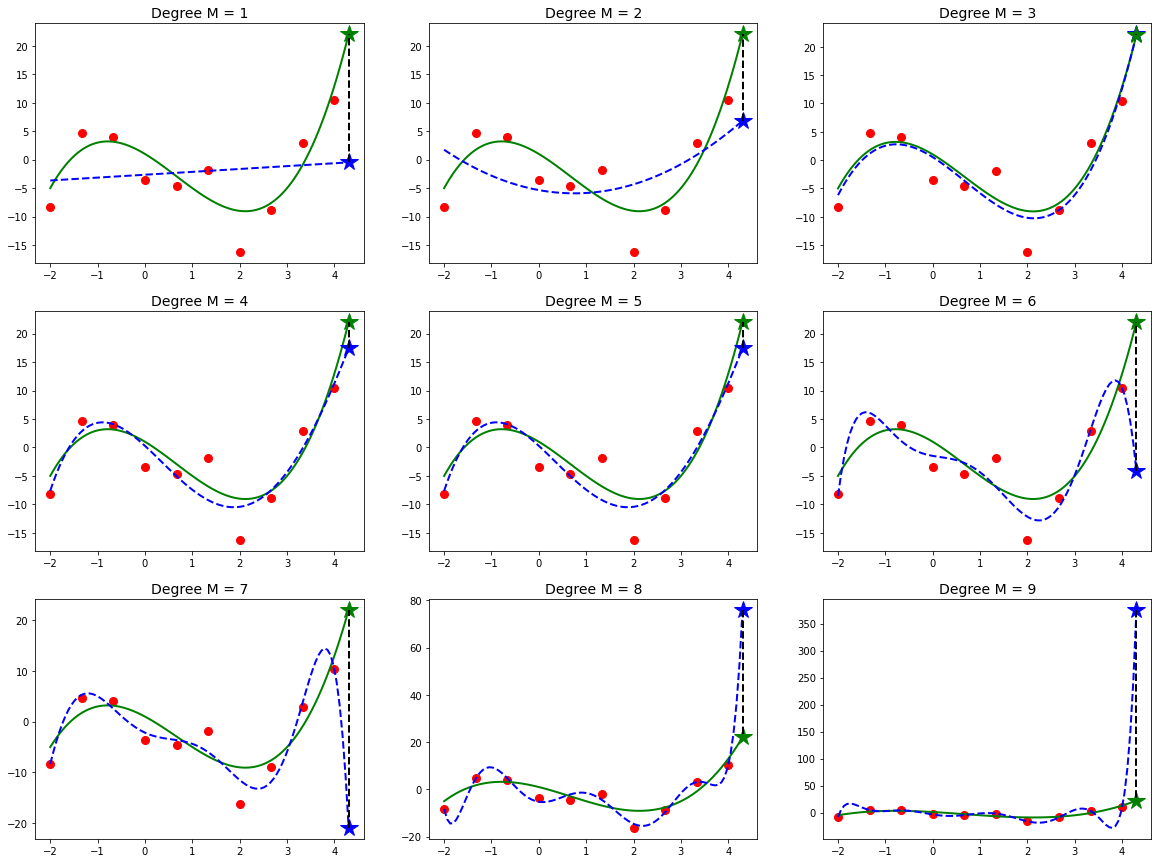

In [27]:
#visualize all the fits, and see how they behave against the underlying formula and in particlar the test observation
plt.figure(figsize = (20,15))

for M in range(1,10):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-2,4.3,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    y_future = 0
    x_future = x_test
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(data2.x1, data2.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'b*', markersize = 18)        # Blue star, fitted value
    plt.plot(x_future, y_test, 'g*', markersize = 18)     # Green star, true value
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2)
    plt.title('Degree M = %d'%(M), fontsize = 14)

This makes a clear case - while for $M=3$ we get a nearly perfect fit (which is not really surprising if we recall that underlying generating function was cubic) increasing $M$ further actually makes the model less capable of giving reasonable predictions for an "out-of-training-sample" argument $x_{test}$.

### Back to example 1

Recall we have more data in data1_2 and data1_3. Let's see if the model is going to do any good there. This procedure is called validation. Call:   
data1 - *training sample* (where the models are trained)  
data1_2 - *validation sample* (where the candidate models are validated)  
data1_3 - *test sample* (where the final model will get tested)

In [28]:
#generate regressors in the validation sample and compute the model prediction
M=15
for p in range(1,M+1): #add more powers of x up to M'th
    data1_2['x%d'%p]=data1_2.x**p
data1_2['ypred']=lm15.predict(data1_2)

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

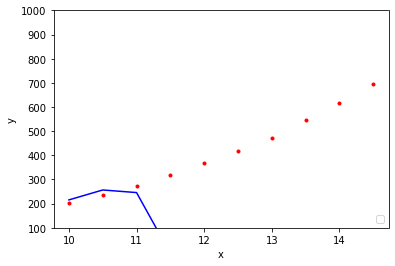

In [29]:
#visualize the fit
plt.plot(data1_2.x,data1_2.y,'.r') #plot the data
plt.plot(data1_2.x,data1_2.ypred,'b') #plot the regression
plt.legend(loc='lower right')
plt.ylim(100,1000)
plt.xlabel('x')
plt.ylabel('y')

In [30]:
#compute R2 over the validation data
ValidR2=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
ValidR2

-115229.26243850632

So the more regressors does not always mean the better. M (the max power of x to consider) can be seen as a parameter defining complexity of the model. 

Choose the optimal value for M in terms of the validation R2

In [31]:
TrainR2=[0]*15
ValidR2=[0]*15
lm=[0]*15
for M in range(1,16):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm[M-1] = smf.ols(formula=formula, data = data1).fit()
    data1_2['ypred']=lm[M-1].predict(data1_2)
    ValidR2[M-1]=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

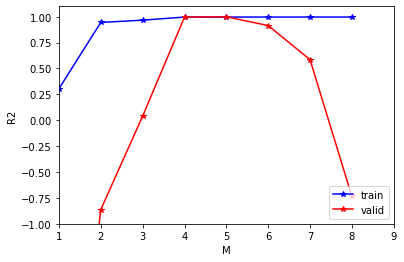

In [32]:
plt.plot(range(1,9),TrainR2[:8],'b-*',label='train')
plt.plot(range(1,9),ValidR2[:8],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(-1,1.1)
plt.xlim(1,9)
plt.legend(loc='lower right')

In [33]:
M=np.argmax(ValidR2)+1; M

5

In [34]:
lm[M-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2054.
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           3.81e-41
Time:                        08:57:53   Log-Likelihood:                -93.791
No. Observations:                  40   AIC:                             199.6
Df Residuals:                      34   BIC:                             209.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8665      0.815     -1.064      0.295      -2.522       0.789
x              1.6565      0.329      5.039      0.000       0.988       2.325
x2             0.3579      0.052      6.902      0.000       0.253       0.463
x3             0.0595      0.013      4.579      0.000       0.033       0.086
x4             0.0100      0.001     16.958      0.000       0.009       0.011
x5         -5.674e-05      0.000     -0.493      0.625      -0.000       0.000
==============================================================================
Omnibus:                        0.224   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.411
Skew:                          -0.118   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                     5.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#generate regressors in the validation sample and compute the model prediction
for p in range(1,M+1): #add more powers of x up to M'th
    data1_3['x%d'%p]=data1_3.x**p
data1_3['ypred']=lm[M-1].predict(data1_3)
TestR2=1-((data1_3.ypred-data1_3.y)**2).sum()/((data1_3.y-data1_3.y.mean())**2).sum()
TestR2

0.9859518733716056

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

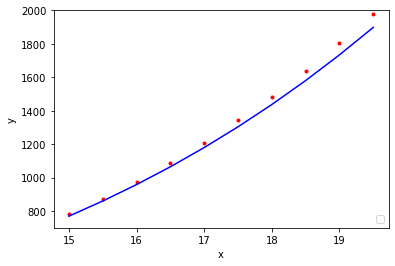

In [36]:
#visualize the fit
plt.plot(data1_3.x,data1_3.y,'.r') #plot the data
plt.plot(data1_3.x,data1_3.ypred,'b') #plot the regression
plt.legend(loc='lower right')
plt.ylim(700,2000)
plt.xlabel('x')
plt.ylabel('y')

## Homework

In [40]:
#upload the data
data1 = pd.read_csv('Data/HW11_poly_regression.csv')
data1 = data1.drop(columns=['Unnamed: 0'])

for p in range(2,13):
    data1['x%d'%p]=data1.x**p

data1.head()

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,-15.0,-2156.994097,225.00,-3375.000,50625.0000,-759375.00000,1.139062e+07,-1.708594e+08,2.562891e+09,-3.844336e+10,5.766504e+11,-8.649756e+12,1.297463e+14
1,-14.5,-1956.523904,210.25,-3048.625,44205.0625,-640973.40625,9.294114e+06,-1.347647e+08,1.954088e+09,-2.833427e+10,4.108469e+11,-5.957280e+12,8.638056e+13
2,-14.0,-1778.151738,196.00,-2744.000,38416.0000,-537824.00000,7.529536e+06,-1.054135e+08,1.475789e+09,-2.066105e+10,2.892547e+11,-4.049565e+12,5.669391e+13
3,-13.5,-1610.924846,182.25,-2460.375,33215.0625,-448403.34375,6.053445e+06,-8.172151e+07,1.103240e+09,-1.489375e+10,2.010656e+11,-2.714385e+12,3.664420e+13
4,-13.0,-1456.176307,169.00,-2197.000,28561.0000,-371293.00000,4.826809e+06,-6.274852e+07,8.157307e+08,-1.060450e+10,1.378585e+11,-1.792160e+12,2.329809e+13


### Q1: Split this given dataset into training set (first 64 observations, validation (next 8) and test set (last 8)

In [41]:
train = data1[:64]
valid = data1[64:72]
test = data1[72:]

In [42]:
print(train.shape, valid.shape, test.shape)

(64, 13) (8, 13) (8, 13)


### Q2: Visualize the training data and try to fit a linear regression model to it. Add the regression line on the plot
Comment whether you think this data is suitable to fit a linear model.

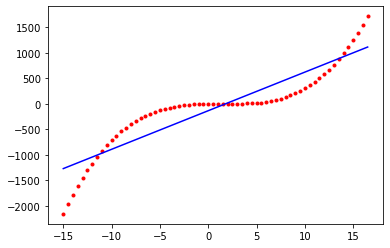

In [43]:
lm = smf.ols(formula='y~x', data = train).fit()
plt.plot(train.x,train.y,'.r')
plt.plot(train.x,lm.predict(train),'b')

### Q3: Fit the quadratic model
Try to introduce another regressor variable (x^2) if you think that linear model underfits. Report the resilts and visualize the fit

In [44]:
lm = smf.ols(formula='y~x+x2', data = train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           7.67e-25
Time:                        08:58:02   Log-Likelihood:                -457.62
No. Observations:                  64   AIC:                             921.2
Df Residuals:                      61   BIC:                             927.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7448     59.115     -1.028      0.3

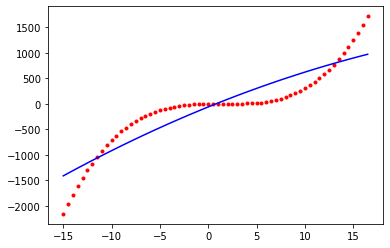

In [45]:
pred = lm.predict(train)
plt.plot(train.x,train.y,'.r')
plt.plot(train.x,pred,'b')

### Q4: Fit the 12th degree polynomial model
Generate regressors in the training, validation and test sample as powers of x from x ** 2 to x ** 12 (i.e max power M=12) and compute the 12 degree model prediction.Visualize the fit of the model. Assess performance over the validation set, computing the validation R2 and visualizing the fit

### Q5 : Perform model degree selection. 
Train the polinomial model over training sample and compute R2 over the validation data for each power m=1,2,...12. Visualize the training and validation R2 as the function of m. What is the optimal value of $1\leq m\leq M$ in terms of the validation R2?

<span style="color:red;font-size:15pt">I combined Q4 and Q5 together, because I am using the same loop to fit, train, store the features and result. 'Info' has the model infomation </span>

In [46]:
TrainR2=[0]*12
ValidR2=[0]*12
Params=[0]*12
lm=[0]*12
info=[]
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    info.append("index = {0}, degree = {1}, formula={2}".format(M-1, M, formula))
    lm[M-1] = smf.ols(formula=formula, data = train).fit()
    valid['ypred']=lm[M-1].predict(valid)
    Params[M-1]=(lm[M-1].params)
    ValidR2[M-1]=1-((valid.ypred-valid.y)**2).sum()/((valid.y-valid.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

In [47]:
ValidR2

[-6.4819434556610025,
 -8.852492954575437,
 0.9999821286745456,
 0.9999860160225779,
 0.9997698831897365,
 0.9999162082369163,
 0.9969762236500905,
 0.9999271270125083,
 0.950848265894898,
 0.9893819176382062,
 0.1366863364173646,
 0.9812758283949978]

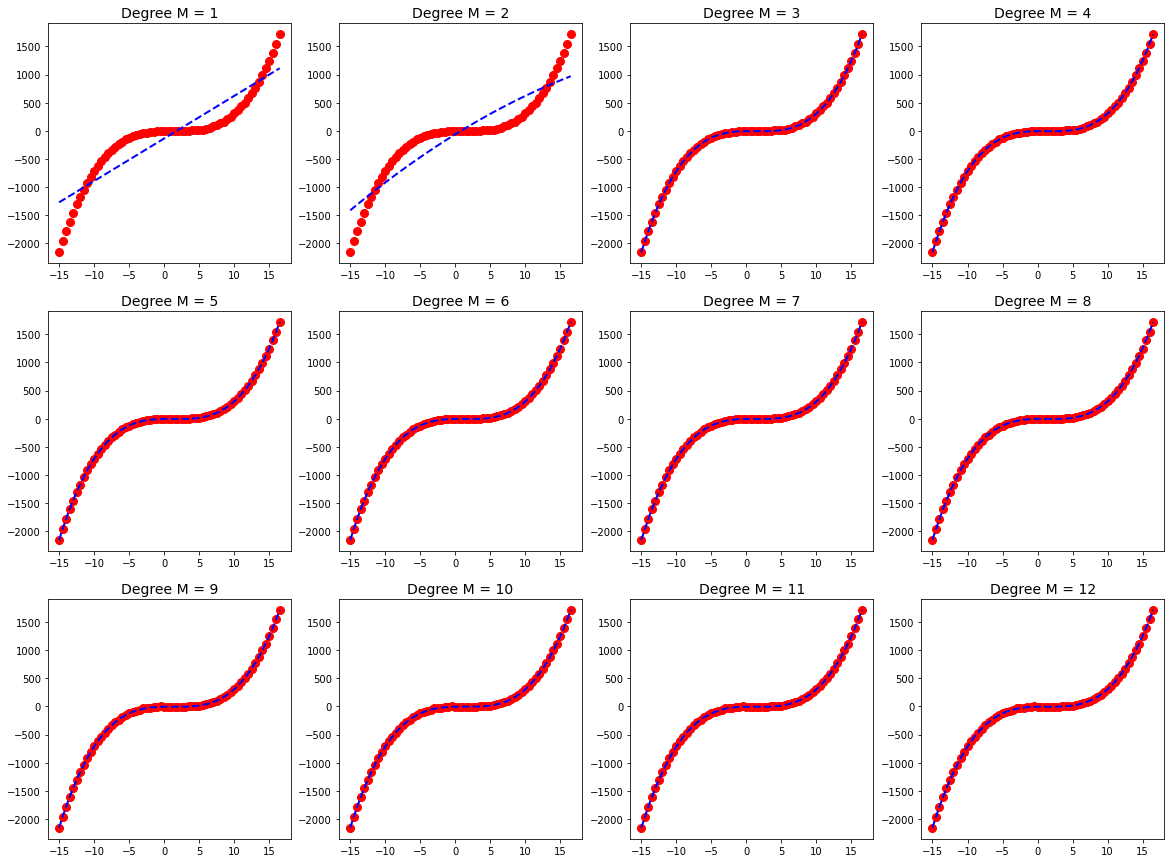

In [48]:
plt.figure(figsize = (20,15))

for M in range(1,13):
    plt.subplot(3,4,M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-15,16.5,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(train.x, train.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

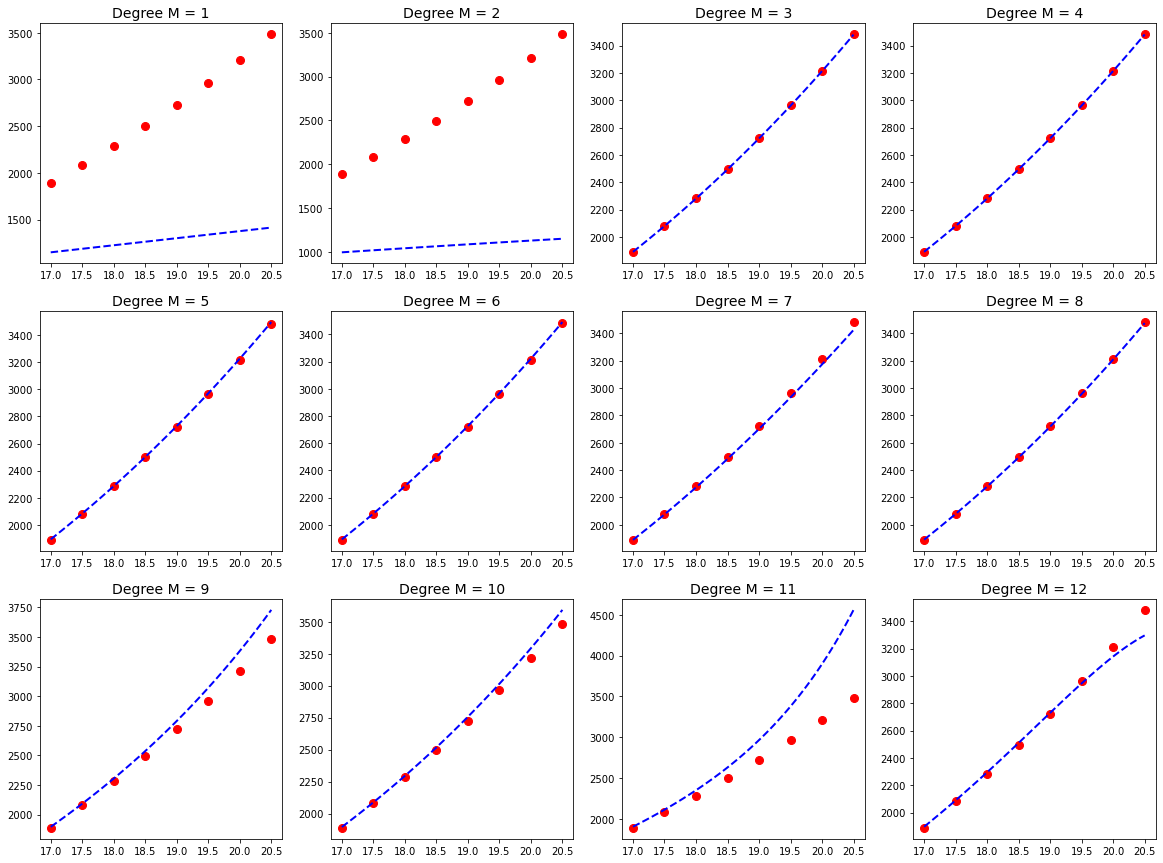

In [49]:
plt.figure(figsize = (20,15))

for M in range(1,13):
    plt.subplot(3,4,M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(17,20.5,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(valid.x, valid.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

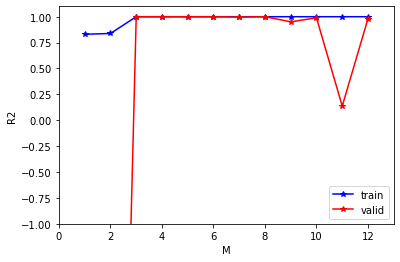

In [50]:
plt.plot(range(1,13),TrainR2[:13],'b-*',label='train')
plt.plot(range(1,13),ValidR2[:13],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(-1,1.1)
plt.xlim(0,13)
plt.legend(loc='lower right')

In [51]:
M=np.argmax(ValidR2)+1; M

4

### Q6: Assess the final model performance over the test set 
Visualize the fit of the model (with the optimal m you found above) over the test set, assess the test R2

In [52]:
info[M-1]

'index = 3, degree = 4, formula=y~x+x2+x3+x4'

In [53]:
#generate regressors in the validation sample and compute the model prediction
predict=lm[M-1].predict(test)
TestR2=1-((predict-test.y)**2).sum()/((test.y-test.y.mean())**2).sum()
TestR2

0.999953937547655

Text(0, 0.5, 'y')

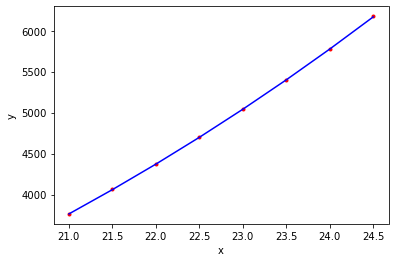

In [54]:
#visualize the fit
plt.plot(test.x,test.y,'.r') #plot the data
plt.plot(test.x,predict,'b') #plot the regression
plt.xlabel('x')
plt.ylabel('y')